hello world!


In [ ]:
pip install numpy matplotlib pandas scikit-learn

Downsized sample is a linear graph because there aren't enough data points


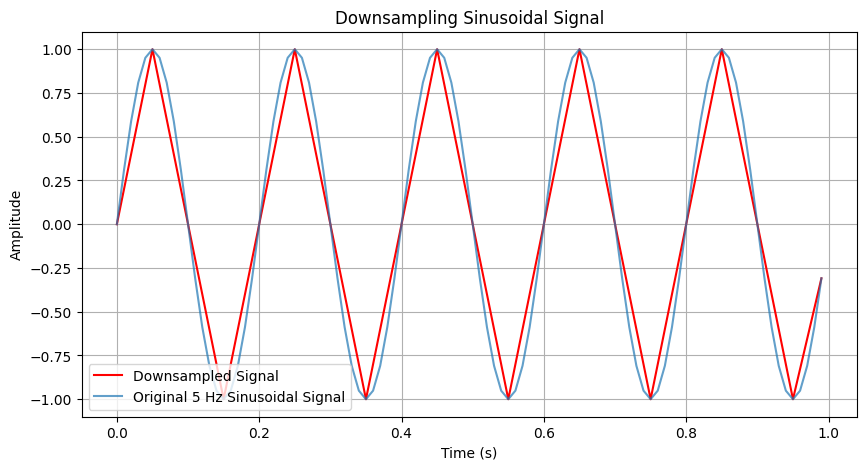

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

downsample_factor = 5

def downsample_sin(signal: np.array):
    # input signal: frequency 5, sample gap = 0.01 s
    
    # downsize the array by the factor
    downsampled_indices = np.arange(0, len(signal), downsample_factor)

    # Finding the peaks and troughs
    diff_arr = np.diff(signal)
    troughs = np.where((diff_arr[:-1] < 0) & (diff_arr[1:] > 0))[0] + 1
    peaks = np.where((diff_arr[:-1] > 0) & (diff_arr[1:] < 0))[0] + 1
    # Combine and sort indices of extrema
    extrema_indices = np.sort(np.concatenate((peaks, troughs)))
    # Combining the indices
    combined_indices = np.unique(np.concatenate((downsampled_indices, extrema_indices)))
    # adding the last index
    last_index = len(signal) - 1
    combined_indices = np.unique(np.append(combined_indices, last_index))

    # Get the downsampled signal (y values)
    downsampled_signal = signal[combined_indices]

    
    # Plot the downsized signal
    plt.figure(figsize=(10, 5))
    plt.plot(t[combined_indices], downsampled_signal, color='red', label='Downsampled Signal')

    return downsampled_signal



# Test the function
t = np.arange(0, 1, 0.01)  # Time vector (0 to 1 second, sampled every 0.01s)
frequency = 5  # 5 Hz
signal = np.sin(2 * np.pi * frequency * t)


# call the function (plots within the function to follow function guidelines of the assignment)
downsampled_signal = downsample_sin(signal)
# Plot the original signal
plt.plot(t, signal, label='Original 5 Hz Sinusoidal Signal', alpha=0.7)

print("Downsized sample is a linear graph because there aren't enough data points")

# More plot info
plt.title('Downsampling Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

### Q2 

#### part 1

Plot the price of all the laptops

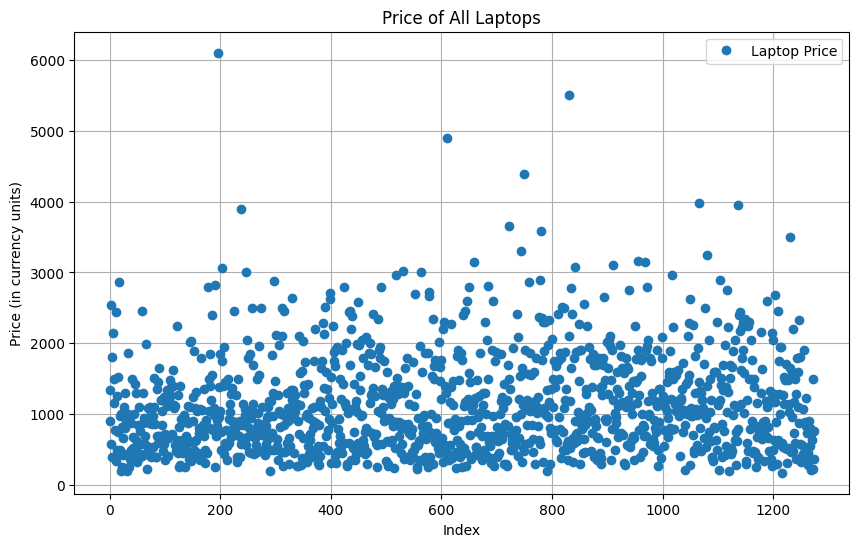

In [11]:
# Path to the laptop dataset
file_path = 'laptop_price - dataset.csv'

# Reading the CSV file, saving as a dataframe
data = pd.read_csv(file_path)

# Plot the laptop prices on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Price (Euro)'], marker='o', alpha=0.8)
plt.title('Price of All Laptops')
plt.xlabel('Index')
plt.ylabel('Price (in currency units)')
plt.grid()
plt.legend()
plt.show()

#### Part 2

Which company has on average the most expensive laptop? What is the average
laptop price for each company?

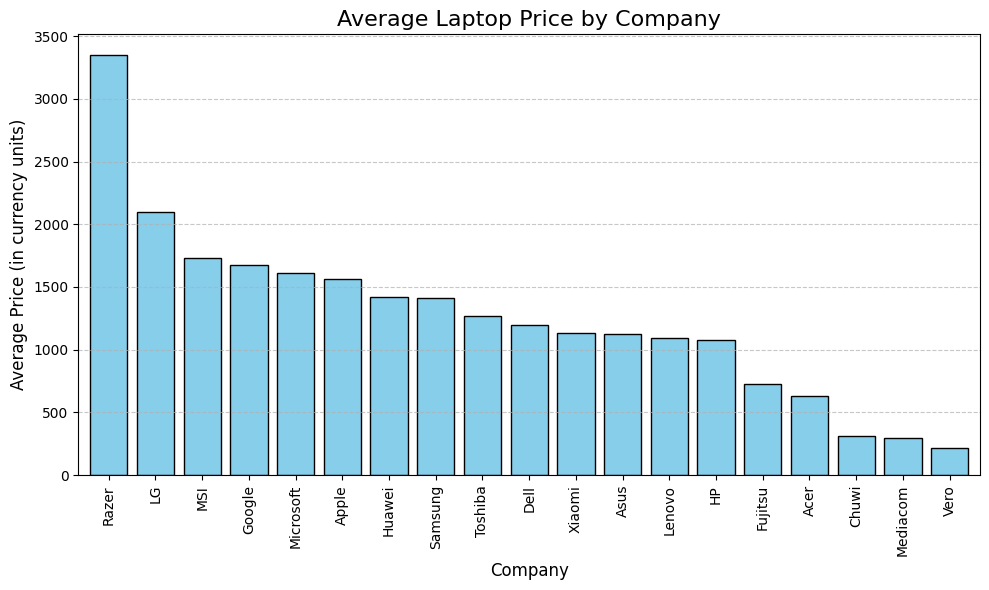

In [16]:
grouped = data.groupby('Company')

# Group the data by company
average_price = grouped['Price (Euro)'].mean()

# Sort the average prices from largest to smallest
average_price_sorted = average_price.sort_values(ascending=False)

# Plot the average prices as a bar graph
plt.figure(figsize=(10, 6))
average_price_sorted.plot(kind='bar', width = 0.8 ,color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (in currency units)', fontsize=12)
plt.xticks(rotation=90, fontsize = 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#### Part 3

Find the different types of Operating systems present in the data - under the column
name 'OpSys'.
- Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [17]:
# Defining operating system names:
mac_str = 'Mac OS'
windows_str = 'Windows'

# Cleaning - Replacing the data to be uniform
data['OpSys'] = data['OpSys'].replace({'macOS':mac_str, 'Mac OS X':mac_str, 'Windows 10':windows_str, 'Windows 10 S':windows_str, 'Windows 7':windows_str})

# Print the fixed uniform operating systems
OP_Systems_Fixed = data['OpSys'].unique()
print("After Fix: ", OP_Systems_Fixed)

After Fix:  ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


#### Part 4

Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


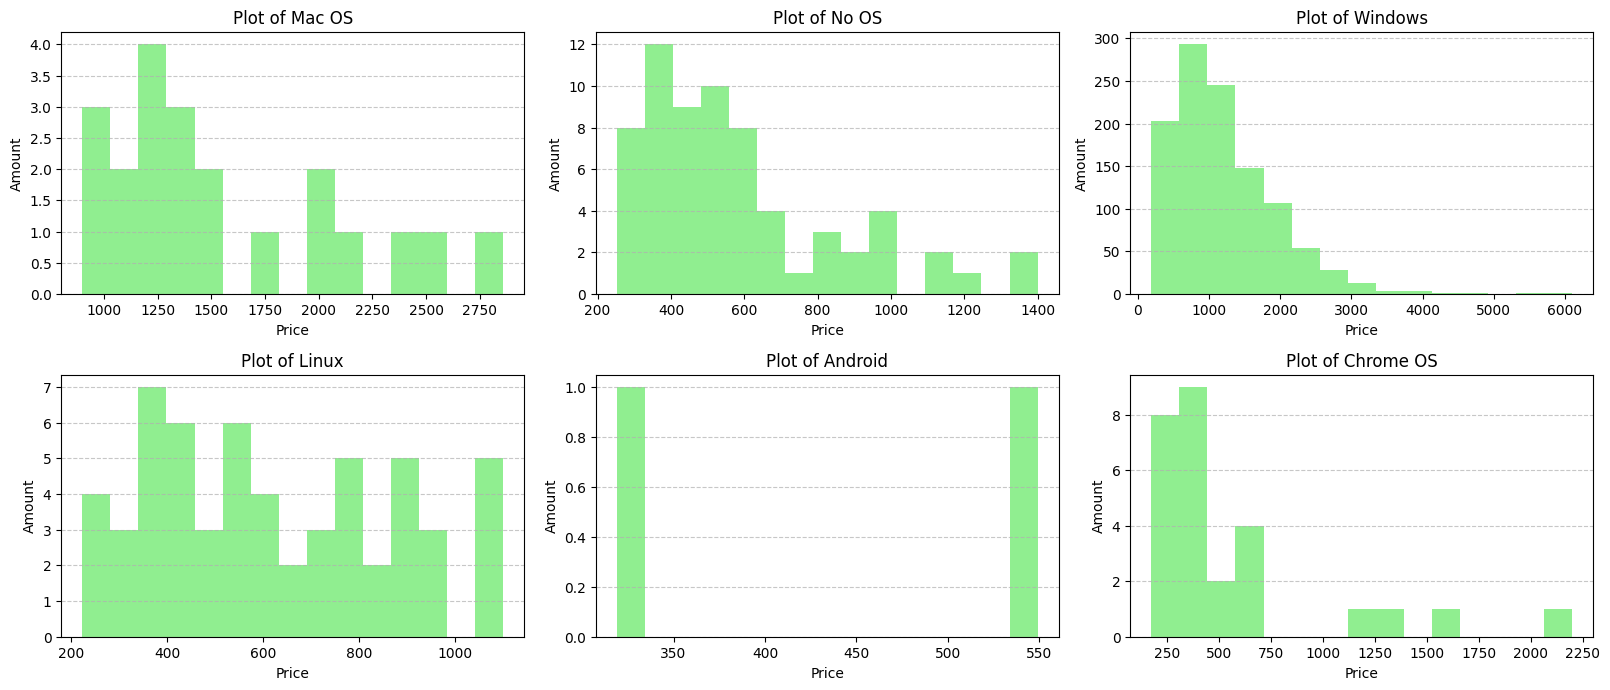

In [19]:
# Getting the different types of OS
unique_opsys = data['OpSys'].unique()
print(unique_opsys)

# Creating the plot
plt.figure(figsize= (16,10))

# Looping through each operating system and subplotting it
for i, op_sys in enumerate(unique_opsys, 1):
    plt.subplot(3, 3, i)
    data[data['OpSys'] == op_sys]['Price (Euro)'].hist(bins=15, color='lightgreen', grid=False)
    plt.title(f"Plot of {op_sys}")
    plt.xlabel("Price")
    plt.ylabel("Amount")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.show()

#### Part 5

What is the relationship between RAM and computer price? add an adequate plot to
support your findings.

In [23]:
# cleaning up irrelevant data (extreme cases)
data = data[data['RAM (GB)'] != 64]

There's a positive correlation between them.


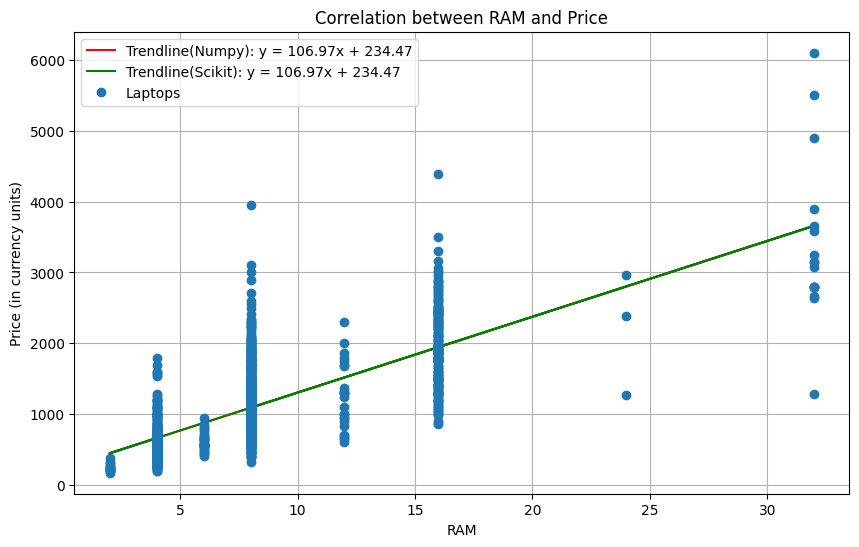

In [24]:
from sklearn.linear_model import LinearRegression
print("There's a positive correlation between them.")

#! clean the data (one point)

plt.figure(figsize=(10, 6))

# Save the arrays of data
x = data['RAM (GB)']
x_2d = data[['RAM (GB)']]
y = data['Price (Euro)']

# Numpy: Calculate linear regression
# Calculate linear regression coefficients (slope `m` and intercept `c`)
m, c = np.polyfit(x, y, 1)  # Degree 1 for linear regression
# Plot the regression line
plt.plot(x, m * x + c, color='red', label=f'Trendline(Numpy): y = {m:.2f}x + {c:.2f}')


# Scikit: Calculate linear regression
# Create the model
model = LinearRegression()
# Train the model
model.fit(x_2d, y)
# Get the slope (coef_) and intercept
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept
# Predict values
y_pred = model.predict(x_2d)
plt.plot(x, y_pred, color='green', label=f'Trendline(Scikit): y = {m:.2f}x + {c:.2f}')

# Plot laptop prices
plt.plot(data['RAM (GB)'], data['Price (Euro)'], marker='o', linestyle='', label='Laptops')
plt.title('Correlation between RAM and Price')
plt.xlabel('RAM')
plt.ylabel('Price (in currency units)')
plt.grid()
plt.legend()
plt.show()

#### Part 6

Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
- For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.

In [ ]:
# Extract storage type
data['Storage type'] = data['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash Storage)')

# Display the updated DataFrame
print(data.head())

## Bonus Question

Think of additional questions related to this data. What types of
analyses and visualizations would you use to address them? Select two questions from
your list and implement. Submit your list of questions, suggested analyses and
visualization and the implementation.

### My questions:
1. What is the correlation between size of Ram, CPU, CPU Frequency and GPUs? If a computer has a powerful part, are the rest of the parts powerful too? 
2. What is the correlation between all the categories and price? Can I use machine learning to predict the price of other models based on other categories?
3. Does a better screen resolution mean a bigger sized screen?
4. What is the correlation between the type of storage (SSD, HDD, or hybrid) and laptop weight (taking into account laptop size)?

### Question 1 - 
What is the correlation between size of Ram, CPU, CPU Frequency and GPUs? If a computer has a powerful part, are the rest of the parts powerful too? 

Steps:
1. We need to quantify all categories. 
2. Then we will perform a correlation analysis
3. Review the results.

In [32]:
import re
import seaborn as sns
# Step 1: Quantify categories

# CPU model grade
def quantify_cpu(cpu_type):
    if 'i3' in cpu_type:
        return 1
    elif 'i5' in cpu_type:
        return 2
    elif 'i7' in cpu_type:
        return 3
    elif 'i9' in cpu_type:
        return 4
    else:
        return 0  # Default for unknown types
    
# cpu generation finder
def extract_generation(cpu_type):
    # Use regex to find a sequence of 4 digits
    match = re.search(r'\b\d{4}\b', cpu_type)
    if match:
        # Return the first digit of the 4-digit number as the generation
        return int(match.group(0)[0])
    return 0  # Default if no match is found

# GPU Grader
def quantify_gpu(gpu_type):
    if 'Quadro' in gpu_type:
        return 4  # Professional GPU
    elif 'HD Graphics' in gpu_type or 'Iris' in gpu_type:
        return 1  # Integrated GPU
    elif 'Radeon' in gpu_type or 'GeForce GTX' in gpu_type:
        return 2  # Mid-range GPU
    elif 'RTX' in gpu_type or 'Radeon Pro' in gpu_type:
        return 3  # High-end GPU
    else:
        return 0  # Unknown GPU type

data = data.copy()
# CPU model score
data['CPU_Score'] = data['CPU_Type'].apply(quantify_cpu)
# Extract generation
data['CPU_Generation'] = data['CPU_Type'].apply(extract_generation)
# Combine CPU and generation scores for a comprehensive CPU score
data['Combined_CPU_Score'] = data['CPU_Score'] + data['CPU_Generation'] / 10
# GPU model score
data['GPU_Score'] = data['GPU_Type'].apply(quantify_gpu)

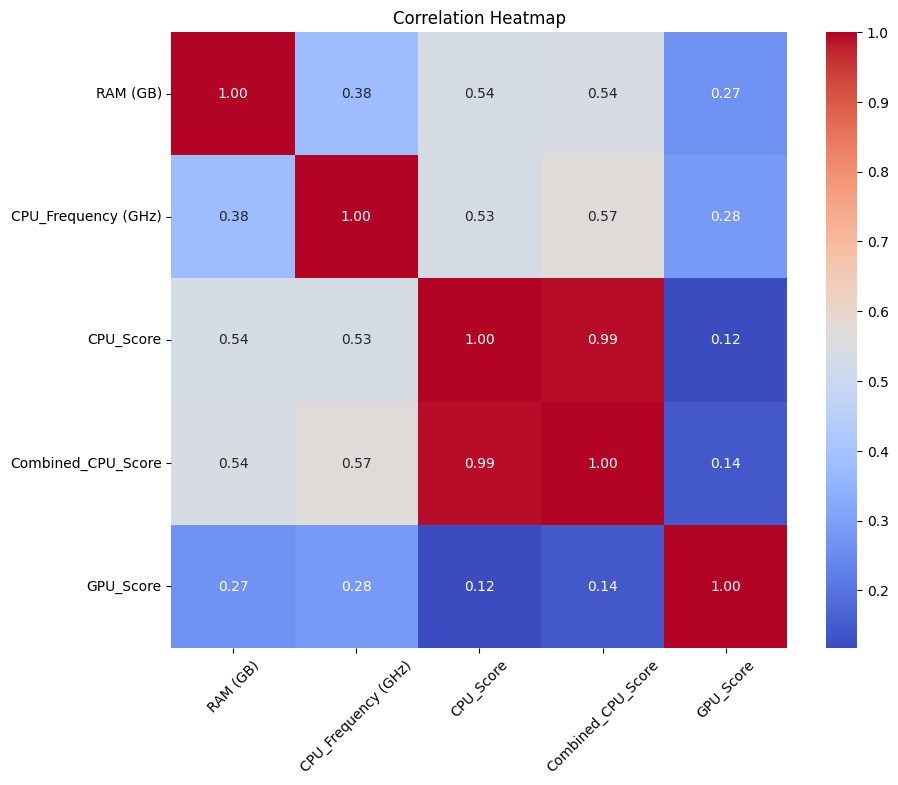

In [31]:
# Step 3: Analysing results

from sklearn.preprocessing import MinMaxScaler
#  Normalize the relevant columns using MinMaxScaler
columns_to_process = ['RAM (GB)', 'CPU_Frequency (GHz)', 'CPU_Score', 'Combined_CPU_Score', 'GPU_Score']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columns_to_process])

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_process)

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Results:
It seems there is not much correlation. This may be attributed to a small quantity of data (only 1000 rows) or an inaccurate calculation of grading the CPUs and GPUs. To continue further I would download a bigger dataset, correct the grading systems and maybe would find a correlation. In the meantime, there seems to be no correlation between the different processing parts of a laptop.

### Question 2 - 
What is the correlation between all the categories and price? Can I use machine learning to predict the price of other models based on other categories?

Steps:
1. Create a heatmap of correlation of all categories to better understand data.
2. Create the model.

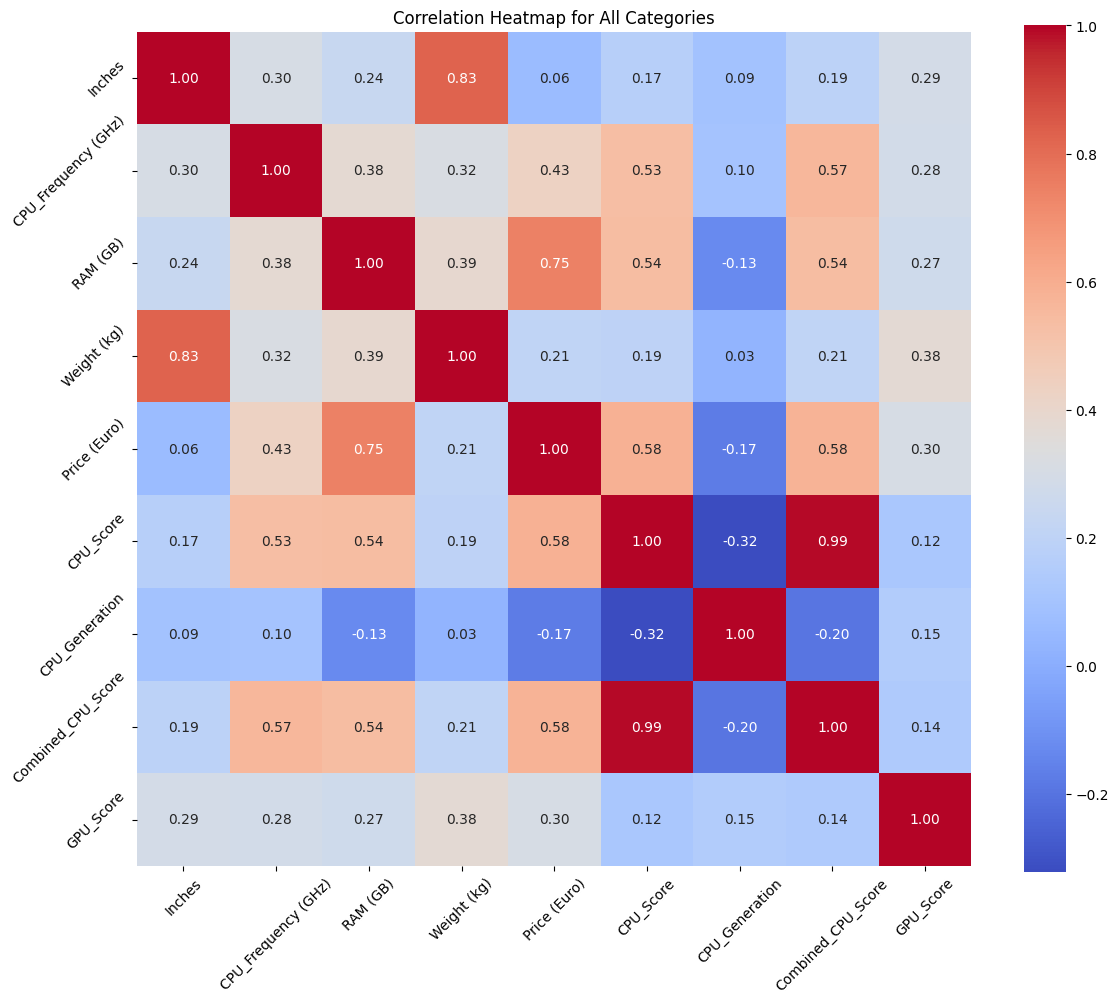

In [33]:
# Select numeric columns for correlation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalize the numeric columns using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[numeric_columns])

# Create a DataFrame from the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap for All Categories')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()